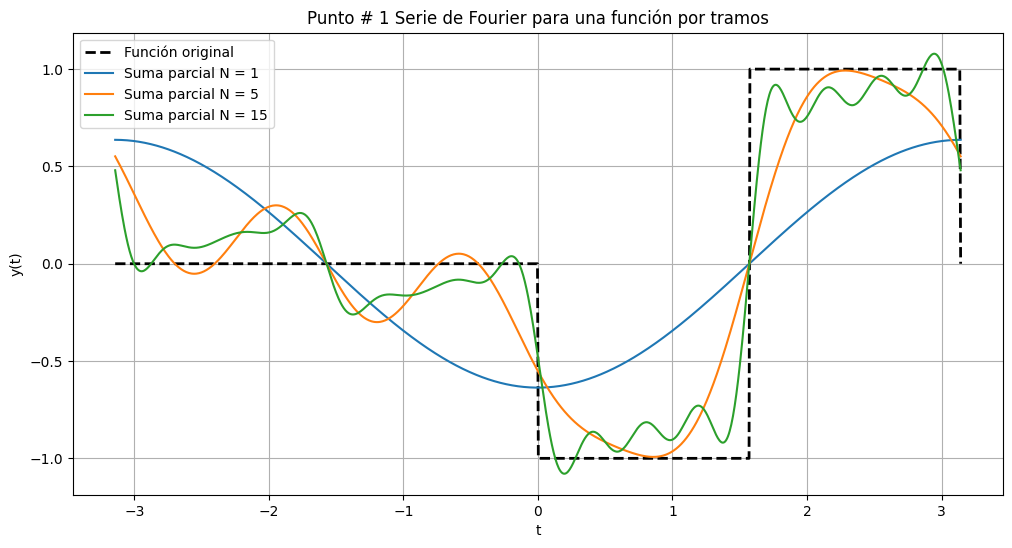

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Dominio
t = np.linspace(-np.pi, np.pi, 1000)

# Función original
def y_original(t):
    y = np.zeros_like(t)
    y[(t > 0) & (t < np.pi/2)] = -1
    y[(t > np.pi/2) & (t < np.pi)] = 1
    return y

# Serie de Fourier parcial
def y_fourier(t, N):
    result = np.zeros_like(t)
    for n in range(1, N + 1):
        an = -2 * np.sin(n * np.pi / 2) / (np.pi * n)
        bn = (-1 + np.cos(n * np.pi / 2) - (-1)**n) / (np.pi * n)
        result += an * np.cos(n * t) + bn * np.sin(n * t)
    return result

# Gráfico
plt.figure(figsize=(12, 6))

# Función original
plt.plot(t, y_original(t), 'k--', label='Función original', linewidth=2)

# Sumas parciales para N = 1, 5, 15
for N in [1, 5, 15]:
    y_N = y_fourier(t, N)
    plt.plot(t, y_N, label=f'Suma parcial N = {N}')

plt.title('Punto # 1 Serie de Fourier para una función por tramos')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()

Saving gas_liquid_data.xlsx to gas_liquid_data (2).xlsx


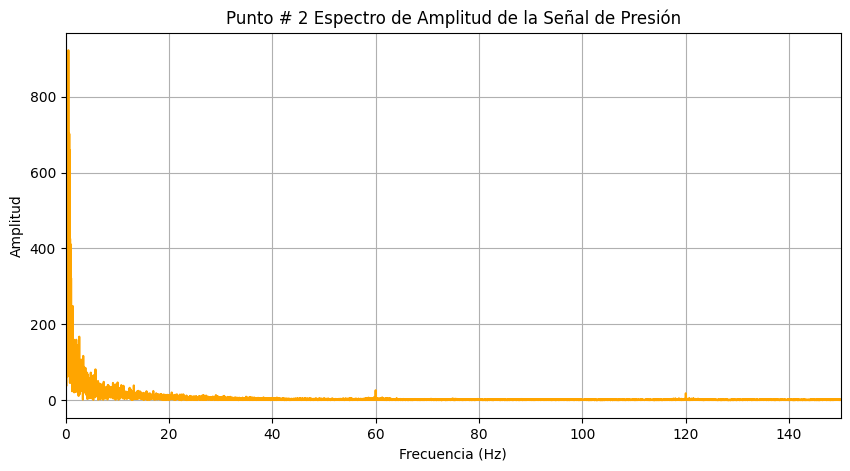

La frecuencia dominante es aproximadamente: 0.53 Hz


In [37]:
#  Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from google.colab import files

#  Subir archivo de Excel con datos de presión
uploaded = files.upload()  # Selecciona tu archivo, por ejemplo: 'gas_liquid_data.xlsx'

#  Cargar el archivo Excel
filename = list(uploaded.keys())[0]  # Nombre del archivo subido
df = pd.read_excel(filename)  # Leer el archivo

#  Extraer columna de presión (usamos la última si no hay nombre)
pressure_data = df.iloc[:, -1].dropna().reset_index(drop=True)

#  Definir parámetros de muestreo
fs = 300  # Frecuencia de muestreo en Hz (300 muestras por segundo)
n = len(pressure_data)  # Número total de muestras
timestep = 1 / fs  # Tiempo entre muestras

# 6: Aplicar la FFT (transformada rápida)
pressure_array = pressure_data.to_numpy()
yf = fft(pressure_array)  # Transformada de Fourier
xf = fftfreq(n, d=timestep)[:n//2]  # Solo mitad positiva de frecuencias
amplitudes = 2.0/n * np.abs(yf[0:n//2])  # Magnitud normalizada

#  Graficar espectro de amplitud
plt.figure(figsize=(10, 5))
plt.plot(xf, amplitudes, color='orange')
plt.title('Punto # 2 Espectro de Amplitud de la Señal de Presión')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(0, fs/2)
plt.show()

#  Encontrar frecuencia dominante
dominant_freq_index = np.argmax(amplitudes[1:]) + 1  # Excluye la componente DC (0 Hz)
dominant_freq = xf[dominant_freq_index]
print(f'La frecuencia dominante es aproximadamente: {dominant_freq:.2f} Hz')